<a href="https://colab.research.google.com/github/datascience-vivek/Outliers_Feature_Engineering/blob/main/Outliers_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Creating a random distribution of numbers:
def create_numbers(mu= 54, sigma= 15, num_samples= 100, seed = 42):##creating normal distribution
  np.random.seed(seed)

  sample_numbers = np.random.normal(loc=mu,scale=sigma, size=num_samples)
  sample_numbers = np.round(sample_numbers, decimals=0)
  return sample_numbers

In [4]:
sample = create_numbers()
print(sample)


[61. 52. 64. 77. 50. 50. 78. 66. 47. 62. 47. 47. 58. 25. 28. 46. 39. 59.
 40. 33. 76. 51. 55. 33. 46. 56. 37. 60. 45. 50. 45. 82. 54. 38. 66. 36.
 57. 25. 34. 57. 65. 57. 52. 49. 32. 43. 47. 70. 59. 28. 59. 48. 44. 63.
 69. 68. 41. 49. 59. 69. 47. 51. 37. 36. 66. 74. 53. 69. 59. 44. 59. 77.
 53. 77. 15. 66. 55. 50. 55. 24. 51. 59. 76. 46. 42. 46. 68. 59. 46. 62.
 55. 69. 43. 49. 48. 32. 58. 58. 54. 50.]


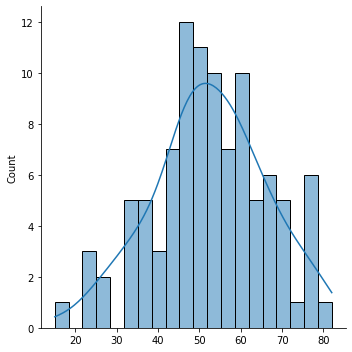

In [5]:
sns.displot(sample, bins = 20, kde= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


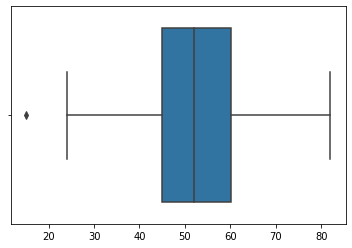

In [6]:
sns.boxplot(sample)

In [7]:
ser = pd.Series(sample)
ser

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 100, dtype: float64

In [8]:
ser.describe()

count    100.000000
mean      52.410000
std       13.610079
min       15.000000
25%       45.000000
50%       52.000000
75%       60.250000
max       82.000000
dtype: float64

In [9]:
IQR = 60.25-45.0

lower_limit = 45 - (1.5*IQR)
lower_limit

22.125

In [10]:
upper_limit = 60.25+(1.5*IQR)
upper_limit

83.125

In [11]:
ser[ser> lower_limit]

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 99, dtype: float64

In [12]:
Q75, Q25 = np.percentile(sample, [75,25])
iqr = Q75-Q25
iqr

15.25

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/ames.csv', index_col=[0])

In [15]:
df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed.Porch    -0.128787
Kitchen.AbvGr     -0.119814
Overall.Cond      -0.101697
MS.SubClass       -0.085092
Low.Qual.Fin.SF   -0.037660
Bsmt.Half.Bath    -0.035835
Yr.Sold           -0.030569
Misc.Val          -0.015691
BsmtFin.SF.2       0.005891
X3Ssn.Porch        0.032225
Mo.Sold            0.035259
Pool.Area          0.068403
Screen.Porch       0.112151
Bedroom.AbvGr      0.143913
Bsmt.Unf.SF        0.182855
Lot.Area           0.266549
X2nd.Flr.SF        0.269373
Bsmt.Full.Bath     0.276050
Half.Bath          0.285056
Open.Porch.SF      0.312951
Wood.Deck.SF       0.327143
Lot.Frontage       0.357318
BsmtFin.SF.1       0.432914
Fireplaces         0.474558
TotRms.AbvGrd      0.495474
Mas.Vnr.Area       0.508285
Garage.Yr.Blt      0.526965
Year.Remod.Add     0.532974
Full.Bath          0.545604
Year.Built         0.558426
X1st.Flr.SF        0.621676
Total.Bsmt.SF      0.632280
Garage.Area        0.640401
Garage.Cars        0.647877
Gr.Liv.Area        0

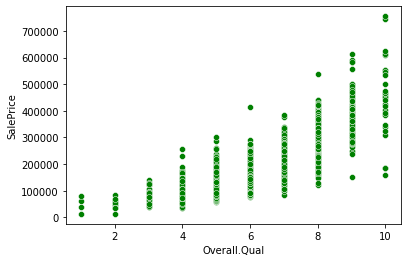

In [17]:
## Highly correlated
sns.scatterplot(x= 'Overall.Qual', y= 'SalePrice', data=df, color= 'green')

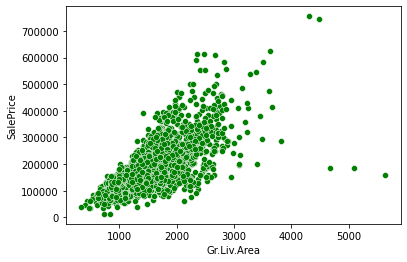

In [18]:
## Highly correlated
sns.scatterplot(x= 'Gr.Liv.Area', y= 'SalePrice', data=df, color= 'green')

In [21]:
df[(df['Overall.Qual']>8) & (df['SalePrice']<200000)]

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [22]:
df[(df['Gr.Liv.Area']>4000) & (df['SalePrice']<400000)]

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [23]:
##Storing index value in the drop ind
drop_ind = df[(df['Gr.Liv.Area']>4000) & (df['SalePrice']<400000)].index

In [24]:
df = df.drop(drop_ind, axis = 0)

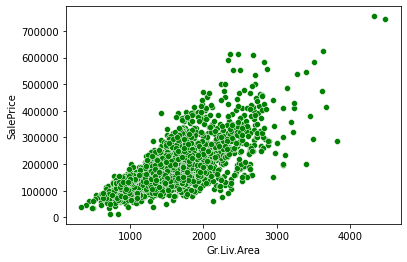

In [26]:
## Outliers dropped
sns.scatterplot(x= 'Gr.Liv.Area', y= 'SalePrice', data=df, color= 'green')

In [29]:
df.to_csv('/content/drive/MyDrive/Datasets/ames_clear_outliers.csv')

In [33]:
df = pd.read_csv(r'/content/drive/MyDrive/Datasets/ames_clear_outliers.csv', index_col=[0])

In [31]:
df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [34]:
df = df.drop("PID", axis = 1)

In [35]:
len(df.columns)

80

In [37]:
df.isnull().sum()

MS.SubClass         0
MS.Zoning           0
Lot.Frontage      490
Lot.Area            0
Street              0
                 ... 
Mo.Sold             0
Yr.Sold             0
Sale.Type           0
Sale.Condition      0
SalePrice           0
Length: 80, dtype: int64

In [38]:
(df.isnull().sum()/len(df))*100

MS.SubClass        0.00000
MS.Zoning          0.00000
Lot.Frontage      16.74069
Lot.Area           0.00000
Street             0.00000
                    ...   
Mo.Sold            0.00000
Yr.Sold            0.00000
Sale.Type          0.00000
Sale.Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [39]:
def percen_missing(df):
  percent_nan = (df.isnull().sum()/len(df))*100
  percent_nan = percent_nan[percent_nan>0].sort_values()##percentage missing is more than 0%
  return percent_nan 

In [40]:
percent_nan = percen_missing(df)
percent_nan

Electrical         0.034165
Garage.Area        0.034165
Total.Bsmt.SF      0.034165
Bsmt.Unf.SF        0.034165
BsmtFin.SF.1       0.034165
BsmtFin.SF.2       0.034165
Garage.Cars        0.034165
Bsmt.Full.Bath     0.068329
Bsmt.Half.Bath     0.068329
Mas.Vnr.Area       0.785787
Mas.Vnr.Type       0.785787
BsmtFin.Type.1     2.733174
Bsmt.Qual          2.733174
Bsmt.Cond          2.733174
BsmtFin.Type.2     2.767339
Bsmt.Exposure      2.835668
Garage.Type        5.363854
Garage.Finish      5.432183
Garage.Qual        5.432183
Garage.Cond        5.432183
Garage.Yr.Blt      5.432183
Lot.Frontage      16.740690
Fireplace.Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc.Feature      96.412709
Pool.QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

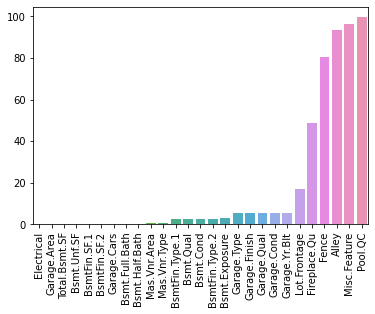

In [43]:

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation = 90)